In [57]:
import openai
openai.api_key = ""  ## Note: an OpenAI api key needs to be added here



In [58]:
import os
from tqdm import tqdm
import json
import time


In [59]:
# conversational prompt based on synthesized data using geo-knowledge

conversational_recog_prompt_syn = [{'role': 'system', 'content': "This is a set of location description recognition problems.\n The `Sentence` is a sentence containing location descriptions. The goal is to infer which parts of the sentence represent location descriptions and the categories of the location descriptions. Split different location descriptions with `;`."},
 
                {'role': 'user','content': 'Sentence: Please help family needs rescue at 112 Wikleson Dr, Houston 42143 \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C1: 112 Wikleson Dr, Houston 42143'},
 
                {'role': 'user','content': 'Sentence: Heavy flooding in the Diego City/Amherst area. Please don\'t go there \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C10: Diego City/Amherst'},
                
                {'role': 'user','content': 'Sentence: Home Depot on Niagara Rd is donating tools for house repair #Harvey \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C2: Niagara Rd'},
               
                {'role': 'user','content': 'Sentence: There is an accident in Port Aransas on Bailey Rd. between Airport Dr and Station St \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C9: Port Aransas; C11: Bailey Rd. between Airport Dr and Station St'},
               
                {'role': 'user','content': 'Sentence: Water & cleaning supplies are needed at Grace Family Bible Church. Please help out...  \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C8: Grace Family Bible Church'},
               
                {'role': 'user','content': 'Sentence: Help needed at memorial Hermann hospital at Gessner Rd in Houston! People need water and food there hurricaneHarvey … \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C8: memorial Hermann hospital; C2: Gessner Rd; C9: Houston'},
                
                {'role': 'user','content': 'Sentence: The intersection of Main road & I-60 is flooded. Very High water. harvey2017 \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C5: Main road & I-60'},
                
                {'role': 'user','content': 'Sentence: A person is trapped at the parking lot off I-10 highway near Buffalo Bayou park … \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C3: I-10 highway; C7: Buffalo Bayou park'},
               
                {'role': 'user','content': 'Sentence: Exit 53 and exit 54 of I-11 are both flooded. Please avoid these two exits. Houston \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C4: Exit 53; C4: exit 54; C3: I-11; C9: Houston'},
               
                {'role': 'user','content': 'Sentence: 63 south, towards the Main St exit: Go to Convention Center. houstonflood 288 texasflood \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C3: 63 south; C4: Main St exit; C7: Convention Center'},
               
                {'role': 'user','content': 'Sentence: Shelters are provided in Williamsville High School. Please go there if you need a place to stay … \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C8: Williamsville High School'},
                
                {'role': 'user','content': 'Sentence: For those of you living in NW Houston/Lakewood Forest, Grant Rd @ Cypress Rd is flooded. Avoid it! \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C10: NW Houston/Lakewood Forest; C5: Grant Rd @ Cypress Rd'},
               
                {'role': 'user','content': 'Sentence: Grandpa needs help at 1831 West Ridge Rd, Sugar Land, TX HarveyStorm HarveyRelief HARVEYHELP HoustonStrande \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C1: 1831 West Ridge Rd, Sugar Land, TX'},
                
                {'role': 'user','content': 'Sentence: High water at the 11th & 30th ave. Houston is battered by heavy rain \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C5: 11th & 30th ave; C9: Houston'},
                
                {'role': 'user','content': 'Sentence: White Oak Bayou around Clear Lake Park. HoustonFloods Houston Heights \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C6: White Oak Bayou; C7: Clear Lake Park; C9: Houston'},
                
                {'role': 'user','content': 'Sentence: This is Buffalo Creek running under Kingsview Bridge near Frontier Drive, crazy … \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C6: Buffalo Creek; C7: Kingsview Bridge; C2: Frontier Drive'},
                
                {'role': 'user','content': 'Sentence: Families living on S. Washington Rd. will have to evacuate before the water gets too high #Harvey \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C2: S. Washington Rd.'},
                
                {'role': 'user','content': 'Sentence: Major flooding at High Rd & 15 Ave. in west Houston. People trapped. Please help... \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C5: High Rd & 15 Ave.; C9: Houston'},
                
                {'role': 'user','content': 'Sentence: Highway 10 between River Rd and 4th St is flooded. Please use local roads NOLA \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C11: Highway 10 between River Rd and 4th St'},
                
                {'role': 'user','content': 'Sentence: If you have things to donate, you can drop them off at ClearField Community Center, Houston, 351 7th Ave. \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C7: ClearField Community Center; C9: Houston; C1: 351 7th Ave'},
                
                {'role': 'user','content': 'Sentence: Hurricane eye wall is approaching Port Aransas, TX. Pray...  \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C9: Port Aransas, TX'},
                                
                {'role': 'user','content': 'Sentence: Do we know the flooding conditions at Buffalo Bayou Park and Minute Maid Park? Any information can help. hurricaneharvey \nQ: Which parts of this sentence represent location descriptions?'},
                {'role': 'assistant', 'content': 'C7: Buffalo Bayou Park; C7: Minute Maid Park'}
                   
               ]

In [60]:
# functions to load harvey dataset
def load_HarveyTweet2017_data(anno_file, data_dir, sep = "||"):
    with open(anno_file, 'r') as f:
        i = 0
        data_list = []
        for line in f:
            line = line.split("\n")[0]
            parts = line.split(sep)
            # print(parts)
            if i == 0:
                cols = parts
            else:
                file = os.path.join(data_dir, parts[0])
                text = parts[1]
                anno = json.loads(parts[2])
                item = {
                    "ID": i - 1,
                    cols[0]: file,
                    cols[1]: text,
                    cols[2]: anno,
                }

                data_list.append(item)

            i += 1
    return data_list


data_dir = "Data/"
anno_file = os.path.join(data_dir, 'tweetTextAndAnnotation_v3.txt')
data_list = load_HarveyTweet2017_data(anno_file, data_dir, sep = "||")



In [61]:
model_name =  "gpt-4o" # "gpt-3.5-turbo" # 

n_tokens = 30
temp=0.2


In [62]:


# conversational version
def get_place_recognition_answer_logits_conversational(row, conv_recog_prompt, text_key = "text"):
    
    text = row[text_key]
    
    this_conv_prompt = conv_recog_prompt.copy()
    this_conv_prompt.append({'role': 'user','content': 'Sentence: '+text+' \nQ: Which parts of this sentence represent location descriptions? '})
    #print(this_conv_prompt)
    
    completion = openai.ChatCompletion.create(
      model=model_name,
      messages=this_conv_prompt,
      max_tokens =  n_tokens,
        temperature=temp,
        top_p=1,
        n=1,
        presence_penalty=0,
        frequency_penalty=0
    )

    answer = completion.choices[0].message["content"]
    
    res_dict = {'answer': answer}

    res_dict = {**res_dict,
                **dict(row)
               }
    return res_dict


In [63]:
####### A test function for a single tweet
    
text = "#HurricaneHarvey INTENSE eye wall of category 4 Hurricane Harvey from Rockport, TX" 
#"someone placed a car here for ins purpose. parking lot of I-10 highway. Terry Hershey Park Parking lot. …"

#"A cattle drive takes to the streets of Dayton, Tx. due to Harvey txwx Video via Rebekah Brand" 
#"someone placed a car here for ins purpose. parking lot of I-10 highway. Terry Hershey Park Parking lot. …"


this_conv_prompt = conversational_recog_prompt_syn.copy()
this_conv_prompt.append({'role': 'user','content': 'Sentence: '+text+' \nQ: Which parts of this sentence represent location descriptions? '})
#print(this_conv_prompt)

completion = openai.ChatCompletion.create(
  model=model_name,
  messages=this_conv_prompt,
  max_tokens =  n_tokens,
    temperature=temp,
    top_p=1,
    n=1,
    presence_penalty=0,
    frequency_penalty=0
)

answer = completion.choices[0].message["content"]
    
answer

'C9: Rockport, TX'

In [64]:
# set the path of the result file (res_file)
res_dir = "Result/" 
if not os.path.exists(res_dir):
    os.mkdir(res_dir)

    
res_file = "{res_dir}/LocationDesc_{model}_Result.json".format(res_dir = res_dir, model = model_name)

# a function to read the result file
def read_res_file(res_file):
    res_dict_list = []
    
    if os.path.exists(res_file):
        with open(res_file, 'r') as f:
            for line in f:
                res_dict = json.loads(line)
                res_dict_list.append(res_dict)
    return res_dict_list


In [65]:

# retrieve only those tweets that haven't been processed to save cost
res_dict_list = read_res_file(res_file)
process_ids = [res_dict['ID'] for res_dict in res_dict_list]

cur_data_list = [item for item in data_list if item["ID"] not in process_ids]


In [66]:
len(cur_data_list)

536

In [67]:
# Start to run the code
count = 0
for i, row in (pbar := tqdm(enumerate(cur_data_list), total= len(cur_data_list) )):
    
    
    res_dict = get_place_recognition_answer_logits_conversational(row, conversational_recog_prompt_syn, text_key = "tweetFulltext")
    
    with open(res_file, 'a') as f:
        f.write(json.dumps(res_dict) + "\n")
      
    #print the result for a preview
#     print("Tweet ID is: "+ res_dict['tweetFileID'])
#     print("Tweet text is: "+ res_dict['tweetFulltext'])
#     print("Annotation is: "+ str(res_dict['tweetAnnotation']))
#     print("Answer is: "+ res_dict['answer'])
    
    count += 1
    time.sleep(0.5)
    
#     if count == 2:
#         break

f.close()


100%|█████████████████████████████████████████████████████████████████████████████| 536/536 [13:48<00:00,  1.55s/it]


### Next, we evaluate the performance of our method

In [68]:
res_file

'Result//LocationDesc_gpt-4o_Result.json'

In [69]:
# read the result

import pandas as pd
res_dict_list = read_res_file(res_file)
res_dict_list
result_df = pd.DataFrame.from_records(res_dict_list)
result_df = result_df[["tweetFileID","tweetFulltext","tweetAnnotation","answer"]]
result_df.head()   

,tweetFileID,tweetFulltext,tweetAnnotation,answer
0,Data/0.txt,Houston HoustonFlood the intersection of I-45 ...,"[{'locationDesc': 'Houston', 'locationCate': '...",C9: Houston; C5: I-45 & N. Main Street
1,Data/1.txt,"HarveyStorm over Austin, TX at 8: 00 AM CDT vi...","[{'locationDesc': 'Austin, TX', 'locationCate'...","C9: Austin, TX"
2,Data/10.txt,"Harvey Elderly dad, brother, daughter and 3yr ...","[{'locationDesc': 'Magnolia Estates', 'locatio...","C8: Senior living community, Magnolia Estates;..."
3,Data/100.txt,Rockport about to get hit by 130 mph winds aft...,"[{'locationDesc': 'Rockport', 'locationCate': ...",C9: Rockport
4,Data/101.txt,Rockport close to re-entering Harvey southern ...,"[{'locationDesc': 'Rockport', 'locationCate': ...",C9: Rockport


In [70]:
# Evaluation without considering categories: Precision, Recall, and F-score

def evaluate_performance_disregard_category(df, model_name):
    
    eval_output_dir = "Output/" 
    if not os.path.exists(eval_output_dir):
        os.mkdir(eval_output_dir)

    total_tp = 0
    total_predicted = 0
    total_true = 0
    
    df = df.reset_index()  # make sure indexes pair with number of rows
    
    # this is the code to output corret and incorrect location descriptions; useful for error analysis
    correctAnalysisFile = open('Output/'+model_name+'-evaluation-string_matched.csv','w', encoding="utf-8")
    correctAnalysisFile.write("annotationDesc|predictDesc\n")
    
    incorrectAnalysisFile = open('Output/'+model_name+'-evaluation-string_not_matched.csv','w', encoding="utf-8")
    incorrectAnalysisFile.write("TweetID|TweetFullText|annotationDesc|predictDesc\n")
    
    
    for index, row in df.iterrows():
        tweetID = row["tweetFileID"].replace("Data/","")
        
          
        this_prediction_list = row['answer'].strip(" ;")
        this_prediction_list = this_prediction_list.split(";")
       
        
        if type(row['tweetAnnotation']) == str:
            this_annotation_list = json.loads(row['tweetAnnotation'])
        else:
            this_annotation_list = row['tweetAnnotation']
        
        #print(row['tweetFulltext'])
        #print(str(this_prediction_list).encode("utf-8"))
        #print(this_annotation_list)
        #print("---")
        
        recognized = 0
        for this_annotation_item in this_annotation_list:
            this_annotation_cate = this_annotation_item['locationCate']
            this_annotation_desc = this_annotation_item['locationDesc']
            this_annotation_desc = this_annotation_desc.strip(".")  # disregard the cases when the difference between the true and predicted is only a .
            
            for this_prediction_item in this_prediction_list:
                this_prediction_item_cleaned = this_prediction_item.strip(" \n")
                this_prediction_result = this_prediction_item_cleaned.split(":")
                
                # check to ensure this is a valid prediction
                if len(this_prediction_result) != 2:
                    this_prediction_list.remove(this_prediction_item)
                    continue
                # check to ensure this is a valid prediction
                
                this_prediction_cate = this_prediction_result[0]
                this_prediction_desc = this_prediction_result[1].strip()
                this_prediction_desc = this_prediction_desc.strip(".")
                
                if this_annotation_desc.lower() == this_prediction_desc.lower():  #an alternative fuzzy way to evaluate: fuzz.ratio(this_annotation_desc.lower(), this_prediction_desc.lower()) >= 75:
                    total_tp += 1
                    total_predicted += 1
                    
                    correctAnalysisFile.write(this_annotation_cate+"|"+this_annotation_desc+"|"+this_prediction_desc+"\n")
                        
                    this_prediction_list.remove(this_prediction_item)  # remove this item from the prediction list once a match is found
                    recognized += 1
                    break
                
            total_true += 1
            
        # those that remain in the prediction list are false positives, i.e., predicted
        for this_prediction_item in this_prediction_list:
            total_predicted += 1
            
            
        # write errors
        if (recognized != len(this_annotation_list)) or (len(this_prediction_list)>0):
            incorrectAnalysisFile.write(tweetID+"|"+row['tweetFulltext']+"|"+str(row['tweetAnnotation'])+"|"+row['answer']+"\n")
                
    
    
    # after all the counts are done, calculate the metrics
    outputResultFile = open('Output/'+model_name+'-evaluation-not_categorized.csv','w')
    outputResultFile.write("Precision,Recall,Fscore\n")
    
    
    total_precision = total_tp*1.0/total_predicted
    total_recall = total_tp*1.0/total_true
    total_fscore = (2 * total_precision * total_recall) / (total_precision + total_recall)
    print("Total precision is "+str(total_precision)+", total recall is "+str(total_recall)+", total fscore is "+str(total_fscore))
    outputResultFile.write(str(total_precision)+","+str(total_recall)+","+str(total_fscore))
    
    
evaluate_performance_disregard_category(result_df,model_name)


Total precision is 0.7058146229130685, total recall is 0.7553912507701787, total fscore is 0.7297619047619047


In [71]:

# Evaluating across categories

def evaluate_performance_with_category(df, model_name):
    
    # create values for the confusion matrix
    total_valid_cate = 11
    
    result_dict={}  # a dictionary used to store the results
    
    df = df.reset_index()
    for index, row in df.iterrows():
        
        tweetID = row["tweetFileID"].replace("Data/","")
       
        this_prediction_list = row['answer'].split(";")
        
        if type(row['tweetAnnotation']) == str:
            this_annotation_list = json.loads(row['tweetAnnotation'])
        else:
            this_annotation_list = row['tweetAnnotation']
        
    
        #print(row['tweetFulltext'])
        #print(str(this_prediction_list).encode("utf-8"))
        #print(this_annotation_list)
        #print("---")
    
        for this_annotation_item in this_annotation_list:
            this_annotation_cate = this_annotation_item['locationCate']
            this_annotation_desc = this_annotation_item['locationDesc']
            this_annotation_desc = this_annotation_desc.strip(".")
            
            matched = False
            for this_prediction_item in this_prediction_list:
                this_prediction_item_cleaned = this_prediction_item.strip(" \n")
                this_prediction_result = this_prediction_item_cleaned.split(":")
    
                # check to ensure this is a valid prediction
                if len(this_prediction_result) != 2:
                    this_prediction_list.remove(this_prediction_item)
                    continue
                # check to ensure this is a valid prediction
    
                this_prediction_cate = this_prediction_result[0]
                this_prediction_desc = this_prediction_result[1].strip()
                this_prediction_desc = this_prediction_desc.strip(".")
                this_prediction_cate_number = int(this_prediction_cate[1:])
    
                if this_annotation_desc.lower() == this_prediction_desc.lower():#(fuzz.ratio(this_annotation_desc.lower(), this_prediction_desc.lower()) >= 75) and (this_prediction_cate_number <= total_valid_cate):
                    combined_cate = this_annotation_cate+this_prediction_cate  #create a unique string for the category id
                    if combined_cate in result_dict.keys():
                        result_dict[combined_cate] = result_dict[combined_cate] + 1
                    else:
                        result_dict[combined_cate] = 1
    
                    this_prediction_list.remove(this_prediction_item)  # remove this item from the prediction list once a match is found
                    matched = True
                    break
    
    
            if not matched:
                combined_cate = this_annotation_cate+"C12"
                if combined_cate in result_dict.keys():
                    result_dict[combined_cate] = result_dict[combined_cate] + 1
                else:        
                    result_dict[combined_cate] = 1
    
    
    
        # those that remain in the prediction list are false positives, i.e., predicted
        for this_prediction_item in this_prediction_list:
            this_prediction_item_cleaned = this_prediction_item.strip(" \n")
            this_prediction_result = this_prediction_item_cleaned.split(":")
            
            # check to ensure this is a valid prediction
            if len(this_prediction_result) != 2:
                this_prediction_list.remove(this_prediction_item)
                continue
            # check to ensure this is a valid prediction
    
            this_prediction_cate = this_prediction_result[0].strip()
            this_prediction_desc = this_prediction_result[1].strip()
            
            if not this_prediction_cate.startswith('C'):
                this_prediction_list.remove(this_prediction_item)
                continue
            
            this_prediction_cate_number = int(this_prediction_cate[1:])
    
            if this_prediction_cate_number <= total_valid_cate:
                combined_cate = "C12"+ this_prediction_cate
            else:
                combined_cate = "C12C12"
                
            if combined_cate in result_dict.keys():
                result_dict[combined_cate] = result_dict[combined_cate] + 1
            else:        
                result_dict[combined_cate] = 1

    
    # after all the counts are done, calculate the metrics
    outputResultFile = open('Output/'+model_name+'-evaluation-categorized.csv','w')
    outputResultFile.write("Model,Category,Precision,Recall,Fscore\n")
    
    

    for cate_num in range(1, total_valid_cate+1):
        value_key = "C"+str(cate_num)+"C"+str(cate_num)
        if value_key in result_dict.keys():
            value = result_dict[value_key]
        else:
            value = 0
        this_tp_count = value
        
        this_true_count = 0
        for pred_cate_num in range(1, total_valid_cate+2):
            value_key = "C"+str(cate_num)+"C"+str(pred_cate_num)
            if value_key in result_dict.keys():
                value = result_dict[value_key]
            else:
                value = 0
            this_true_count += value
        
        this_predict_count = 0
        for true_cate_num in range(1, total_valid_cate+2):
            value_key = "C"+str(true_cate_num)+"C"+str(cate_num)
            if value_key in result_dict.keys():
                value = result_dict[value_key]
            else:
                value = 0
            this_predict_count += value
        
        
        precision = this_tp_count*1.0/(this_predict_count + 0.000001)  # 0.000001 is to avoid the denominator to be 0
        recall = this_tp_count*1.0/(this_true_count + 0.000001)
        fscore = (2 * precision * recall) / (precision + recall + 0.000001)
        print("For category C"+str(cate_num)+": precision is "+str(precision)+", recall is "+str(recall)+", fscore is "+str(fscore))
        outputResultFile.write(model_name+",C"+str(cate_num)+","+str(precision)+","+str(recall)+","+str(fscore)+"\n")
        
        
        
evaluate_performance_with_category(result_df,model_name)     


For category C1: precision is 0.7322834616839233, recall is 0.6966292108740479, fscore is 0.7140110138855034
For category C2: precision is 0.7128712835996471, recall is 0.6371681387735924, fscore is 0.6728966946898618
For category C3: precision is 0.31914892937981004, recall is 0.468749985351563, fscore is 0.37974634385576245
For category C4: precision is 0.11111110493827195, recall is 0.24999996875000394, fscore is 0.15384571597750069
For category C5: precision is 0.5638297812358534, recall is 0.4818181774380166, fscore is 0.5196073411192758
For category C6: precision is 0.5942028899390885, recall is 0.6406249899902345, fscore is 0.6165408448192184
For category C7: precision is 0.6863636332438017, recall is 0.6651982349550739, fscore is 0.6756147096280644
For category C8: precision is 0.25581395229853976, recall is 0.8593749865722659, fscore is 0.39426487660775833
For category C9: precision is 0.746945897474789, recall is 0.7062706258972432, fscore is 0.7260385152757926
For category C

In [72]:
# Visualization
df = pd.read_csv("Output/"+model_name+"-evaluation-categorized.csv")
df.head(15)

,Model,Category,Precision,Recall,Fscore
0,gpt-4o,C1,0.732283,0.696629,0.714011
1,gpt-4o,C2,0.712871,0.637168,0.672897
2,gpt-4o,C3,0.319149,0.468750,0.379746
3,gpt-4o,C4,0.111111,0.250000,0.153846
4,gpt-4o,C5,0.563830,0.481818,0.519607
5,gpt-4o,C6,0.594203,0.640625,0.616541
6,gpt-4o,C7,0.686364,0.665198,0.675615
7,gpt-4o,C8,0.255814,0.859375,0.394265
8,gpt-4o,C9,0.746946,0.706271,0.726039
9,gpt-4o,C10,0.068182,0.375000,0.115384


(0.0, 1.0)

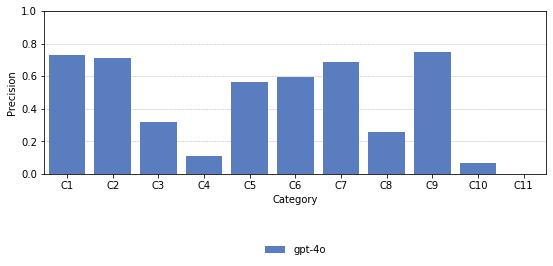

In [73]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
 
# read a titanic.csv file
# from seaborn library
#df = sns.load_dataset('titanic')
 
 
# Show the plot
plt.figure(figsize=(9,3))
# who v/s fare barplot
ax = sns.barplot(x = 'Category',
            y = 'Precision',
            hue = 'Model',
            data = df, order = ["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10","C11"], palette="muted", zorder=3)
#plt.show()
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.55),
    ncol=5,
    title=None, frameon=False,
)
ax.grid(axis='y',linestyle='--', linewidth=0.5, zorder=0)
plt.ylim([0,1])
#plt.savefig("Precision.png", dpi=300, format='png',bbox_extra_artists=(ax,), bbox_inches='tight')

(0.0, 1.0)

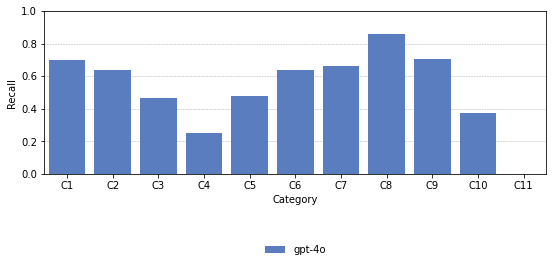

In [74]:
# Show the plot
plt.figure(figsize=(9,3))
# who v/s fare barplot
ax = sns.barplot(x = 'Category',
            y = 'Recall',
            hue = 'Model',
            data = df, order = ["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10","C11"], palette="muted", zorder=3)
#plt.show()
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.55),
    ncol=5,
    title=None, frameon=False,
)
ax.grid(axis='y',linestyle='--', linewidth=0.5, zorder=0)
plt.ylim([0,1])

(0.0, 1.0)

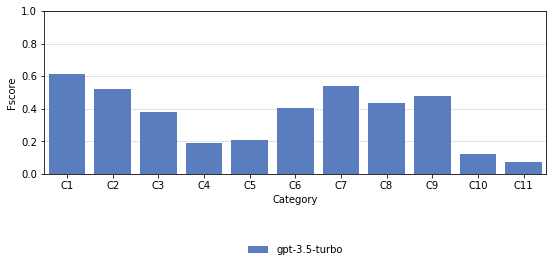

In [56]:
# Show the plot
plt.figure(figsize=(9,3))
# who v/s fare barplot
ax = sns.barplot(x = 'Category',
            y = 'Fscore',
            hue = 'Model',
            data = df, order = ["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10","C11"], palette="muted", zorder=3)
#plt.show()
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.55),
    ncol=5,
    title=None, frameon=False,
)
ax.grid(axis='y',linestyle='--', linewidth=0.5, zorder=0)
plt.ylim([0,1])